In [1]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#Load the Iris Dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

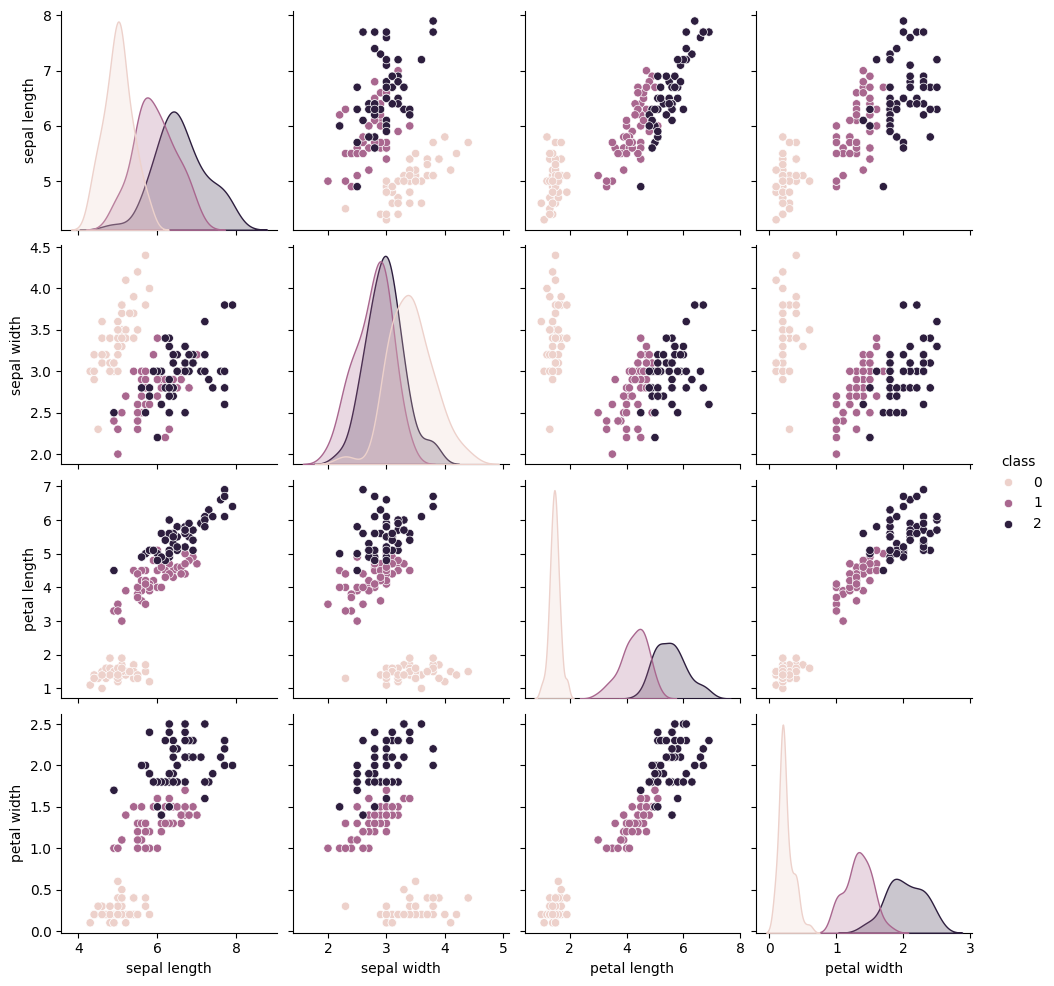

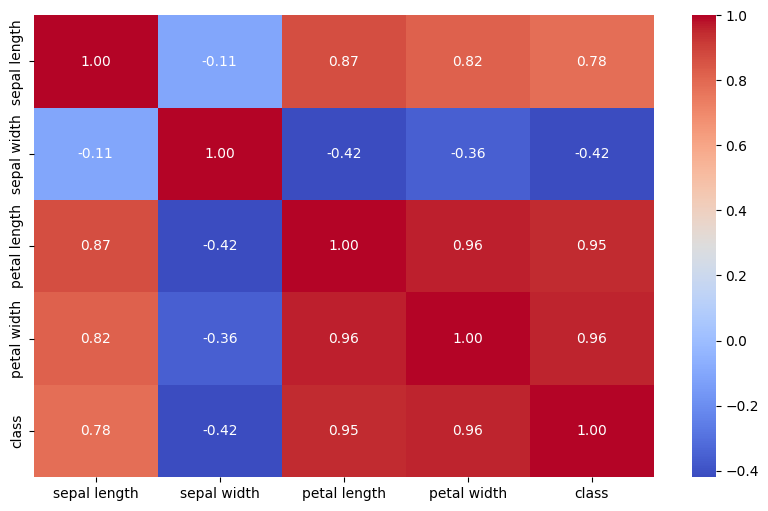

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X and y for easier visualization
df = pd.concat([X, y], axis=1)

# Convert categorical target to numeric for correlation heatmap
df['class'] = df['class'].astype('category').cat.codes

# Pairplot
sns.pairplot(df, hue='class', diag_kind='kde')
plt.show()

# Correlation heatmap (excluding the target variable)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [5]:
#Data Preprocessing
#Split the data into training and testing sets, and scale the features
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Model Training
#Let's use a Random Forest Classifier for this task.
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


In [7]:
#Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



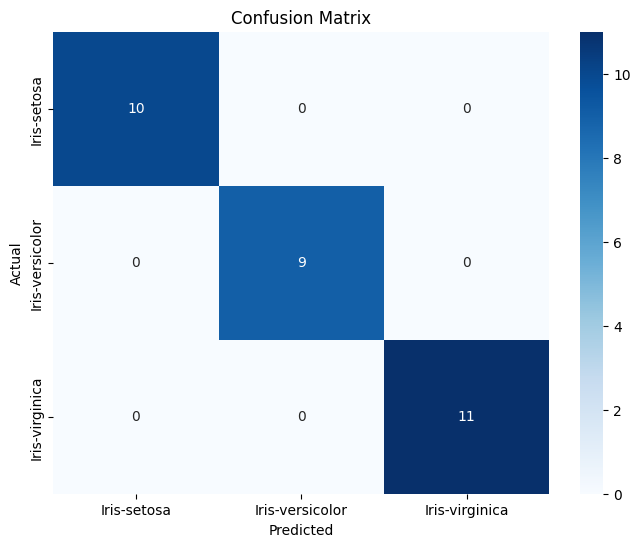

In [8]:
#Visualize the matrix
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
''' In Summary:-
1) Data Loading: Loaded the Iris dataset.
2) Data Visualization: Visualized data using pair plots and a correlation heatmap.
3) Data Preprocessing: Split the data into training and testing sets and scaled the features.
4) Model Training: Trained a Random Forest Classifier.
5) Model Evaluation: Evaluated the model using a confusion matrix and classification report.
6) Results Visualization: Visualized the confusion matrix.'''

In [9]:
#Testing outcomes
# Import necessary library
import numpy as np

# Select a few samples from the test set
num_samples = 5
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

# Get the sample features and their true labels
sample_features = X_test[indices]
true_labels = y_test.iloc[indices]

# Make predictions on these samples
predicted_labels = model.predict(sample_features)

# Display the results
for i in range(num_samples):
    print(f"Sample {i+1}:")
    print(f"Features: {sample_features[i]}")
    print(f"True Label: {true_labels.iloc[i]}")
    print(f"Predicted Label: {predicted_labels[i]}\n")


Sample 1:
Features: [-1.23014297  0.09560575 -1.21993869 -1.30948358]
True Label: class    Iris-setosa
Name: 30, dtype: object
Predicted Label: Iris-setosa

Sample 2:
Features: [-0.01117388 -0.80421307  0.09891395  0.02332414]
True Label: class    Iris-versicolor
Name: 82, dtype: object
Predicted Label: Iris-versicolor

Sample 3:
Features: [-0.13307079 -0.57925837  0.44296246  0.15660491]
True Label: class    Iris-versicolor
Name: 55, dtype: object
Predicted Label: Iris-versicolor

Sample 4:
Features: [-0.86445224  1.67028869 -1.27728011 -1.17620281]
True Label: class    Iris-setosa
Name: 19, dtype: object
Predicted Label: Iris-setosa

Sample 5:
Features: [1.2077952  0.32056046 1.24574233 1.48941263]
True Label: class    Iris-virginica
Name: 143, dtype: object
Predicted Label: Iris-virginica

